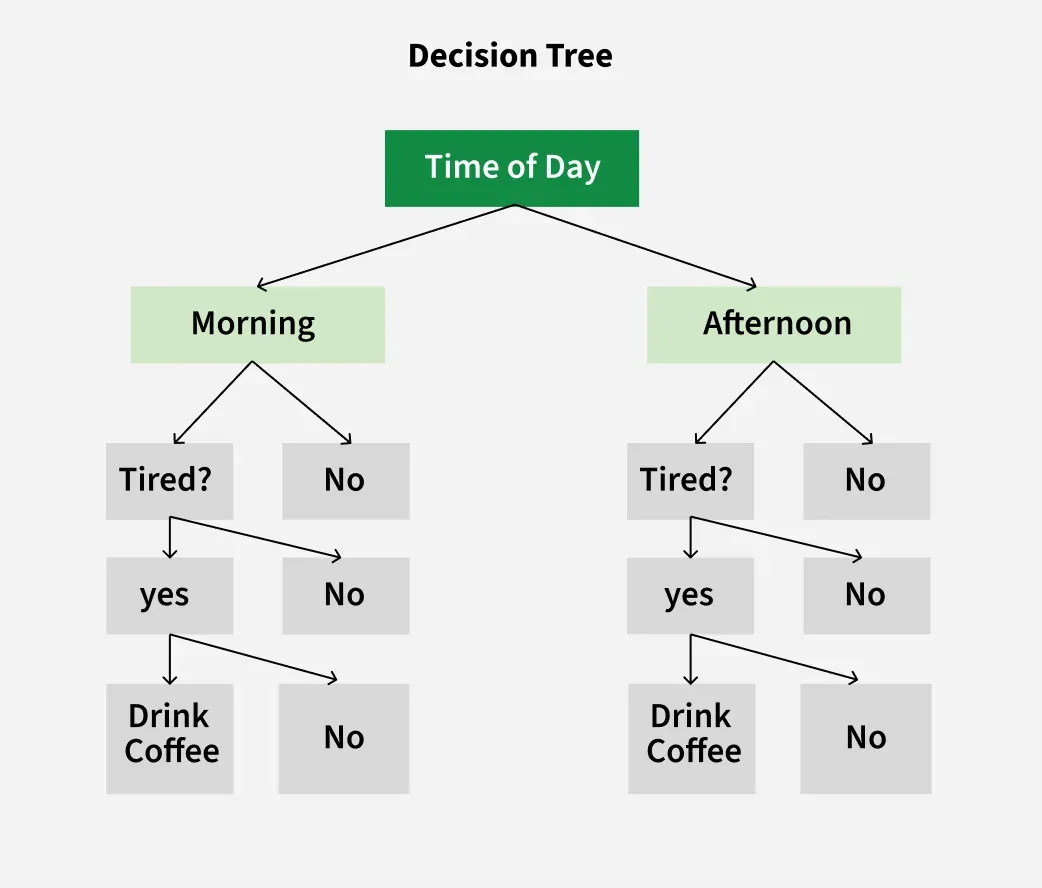


###  A Decision Tree Regression is a machine learning algorithm used to predict numbers (like house prices, temperatures, etc.). 
### It works by breaking data into smaller parts using if-else conditions and making predictions for each part.

#### How It Works?
##### The algorithm looks at the input data and finds the best way to split it into groups.

#### It keeps splitting until each group has very similar values.

#### For a new input, the tree checks which group it belongs to and gives the average value of that group as the prediction.

## Example:
### Imagine you want to predict the price of a house based on its size.

#### If the house is small, it belongs to Group A (cheaper houses).

#### If the house is medium-sized, it belongs to Group B (mid-range prices).

#### If the house is large, it belongs to Group C (expensive houses).

#### When a new house comes in, the model checks which group it fits into and predicts the price accordingly.

### Advantages:
# ✅ Easy to understand and visualize.
# ✅ Can handle both numerical and categorical data.
# ✅ Works well when there are clear patterns in the data.

### Disadvantages:
# ❌ Can become too complex if not controlled (overfitting).
# ❌ Not always the most accurate model for complex problems.

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
X= df.drop(columns='Profit')
y= df['Profit']

In [7]:
X = pd.get_dummies(data=X,columns=['State'],drop_first=True)

In [8]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


# test train split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Step-by-Step Explanation:

1️⃣ train_test_split(X, y, test_size=0.2, random_state=0)

It divides the dataset into two parts:

80% for training (learning from data).

20% for testing (checking how well the model works).

2️⃣ X_train, X_test, y_train, y_test

X_train → Training data (inputs).

X_test → Testing data (inputs).

y_train → Training labels (outputs).

y_test → Testing labels (outputs).

3️⃣ random_state=0

Ensures that every time you run the code, the split remains the same (for consistency).

In [10]:
X_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
28,66051.52,182645.56,118148.20,True,False
11,100671.96,91790.61,249744.55,False,False
10,101913.08,110594.11,229160.95,True,False
41,27892.92,84710.77,164470.71,True,False
2,153441.51,101145.55,407934.54,True,False
27,72107.60,127864.55,353183.81,False,True
38,20229.59,65947.93,185265.10,False,True
31,61136.38,152701.92,88218.23,False,True
22,73994.56,122782.75,303319.26,True,False
4,142107.34,91391.77,366168.42,True,False


In [11]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

# Decision tree regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

Step-by-Step Explanation:

1️⃣ from sklearn.tree import DecisionTreeRegressor

Imports the Decision Tree Regression model from sklearn.

2️⃣ dtr = DecisionTreeRegressor()

Creates a Decision Tree model and stores it in dtr.

Right now, the model is empty (not trained).

3️⃣ dtr.fit(X_train, y_train)

Trains (fits) the Decision Tree model using training data (X_train) and target values (y_train).

The model learns the pattern in the data.

# prediction

In [13]:
y_pred = dtr.predict(X_test)
y_pred

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 108733.99,
        71498.49,  97427.84, 108733.99, 156991.12])

In [14]:
train_acc = dtr.predict(X_train)

In [15]:
dtr.predict([['165349.20','136897.80','471784.10','0','0']])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([192261.83])

In [16]:
import numpy as np

prediction = dtr.predict(np.array([[165349.20, 136897.80, 471784.10, 0, 1]]))
print(int(prediction[0]))  # Convert to integer


192261


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# evaulton

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9769115725762466

In [18]:
r2_score(y_train,train_acc)

1.0